In [1]:
#We have the min and max temperatures in a city In India for each months of the year.We would like to find a function to describe this and show it graphically, the dataset given below.

In [ ]:
#1.fitting it to the periodic function
#2.plot the fit

#Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
#Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
temp_min= np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])

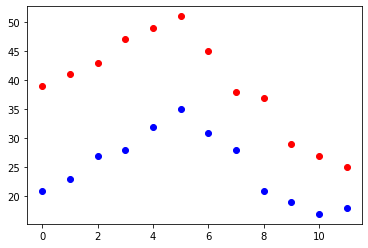

In [5]:
plt.plot(np.arange(12),temp_min,'bo')
plt.plot(np.arange(12),temp_max,'ro')

In [7]:
from scipy import optimize

def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, np.arange(12), temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, np.arange(12), temp_min, [-40, 20, 0])

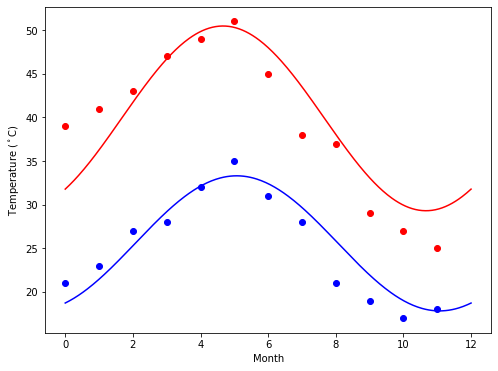

In [8]:
days = np.linspace(0, 12, num=365)

plt.figure(figsize=(8,6))
plt.plot(np.arange(12), temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(np.arange(12), temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

In [14]:
data = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [23]:
#Create a pie chart presenting the male/female proportion
x = data['sex']
a=[1 if i=='male' else 0 for i in x]

In [26]:
data['sex']=a


In [27]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",0,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",1,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",0,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


<AxesSubplot:ylabel='sex'>

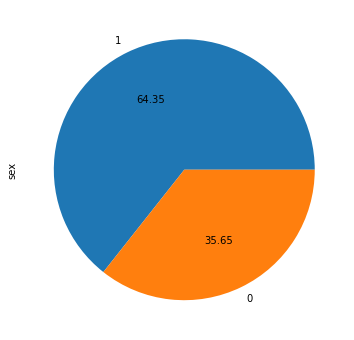

In [56]:
sex = data['sex'].value_counts()
sex.plot.pie(autopct='%.2f',figsize=(10,6))


In [31]:
sex.value_counts()

1    843
0    467
Name: sex, dtype: int64

<AxesSubplot:xlabel='age', ylabel='fare'>

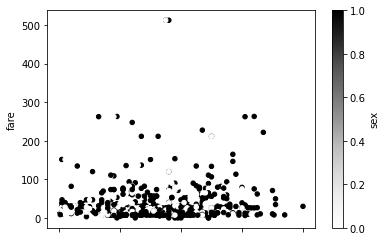

In [42]:
data.plot.scatter(x='age',y='fare',c='sex')

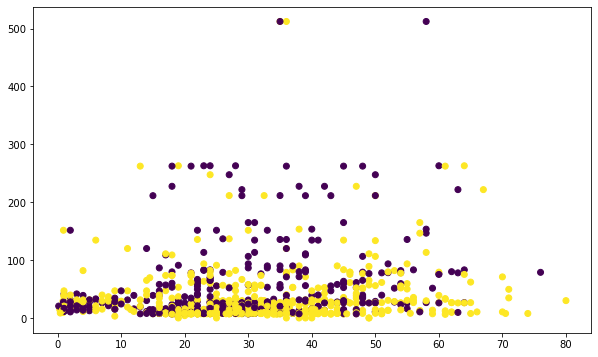

In [54]:
plt.figure(figsize=(10,6))
plt.scatter(x=data['age'],y=data['fare'],c=data['sex'])